In [1]:
import pandas as pd 
import numpy as np

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SUNACTIVITY 데이터를 샘플로 사용해서 파이프라인 테스트합니다.

In [7]:
import statsmodels.api as sm
print(sm.datasets.sunspots.NOTE)
data = sm.datasets.sunspots.load_pandas().data

data.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
data.index.freq = data.index.inferred_freq
del data["YEAR"]
data.tail()

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



,SUNACTIVITY
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5
2008-12-31,2.9


In [9]:
# rolling mean을 넣어서 멀티 채널 (변수가 여러개)로 데이터 만들기
m_data = data.copy()
m_data["rolling_mean"] = data["SUNACTIVITY"].rolling(11).mean()
m_data = m_data.dropna()

<Axes: >

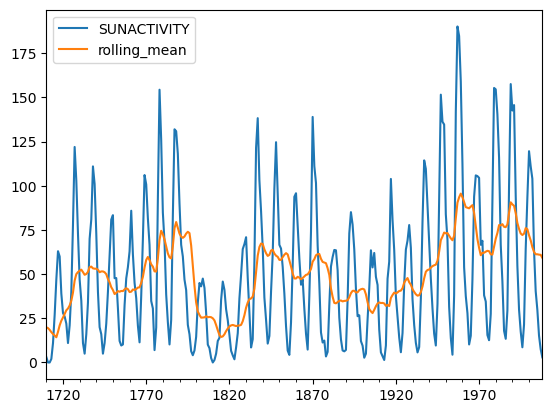

In [11]:
m_data.plot()

In [13]:
window = 9
prediction = 1
test_length = 20

train = m_data[:-test_length] # 1700~1988    #### 여기를 꼭 Series로 넣어야 하나?
test = m_data[-test_length-window:] # 1989~2008

In [14]:
# CSV 파일로 내보내기
train.to_csv('../data/tester/train.csv', index=False)
test.to_csv('../data/tester/test.csv', index=False)